In [14]:
import pandas as pd
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Loading data for information

Preview of the data:
            ID      UPA   EventDate              Employer  \
0  20231211767  2115644  2023-12-31  Georgia Pacific, LLC   
1  20231211765  2115805  2023-12-31   KLX Energy Services   
2  20231211758  2115650  2023-12-30  Liveo Research, Inc.   
3  20231211744  2116350  2023-12-29    Best Pump and Flow   
4  20231211738  2116804  2023-12-29           Leidy's LLC   

                   Address1                 Address2           City  \
0                 1 GP Lane                      NaN         GURDON   
1       EOG Braves 5-H unit  28.35'41.4N 98.49'16.2W      CHARLOTTE   
2    1389 School House Road                      NaN  DELAWARE CITY   
3  1329 Markum Gate Way Rd.                      NaN     FORT WORTH   
4         266 W Cherry Lane                      NaN      SOUDERTON   

          State      Zip  Latitude  ...  General Part of Body  \
0      ARKANSAS  71743.0     33.95  ...     Upper Extremities   
1         TEXAS  78011.0 

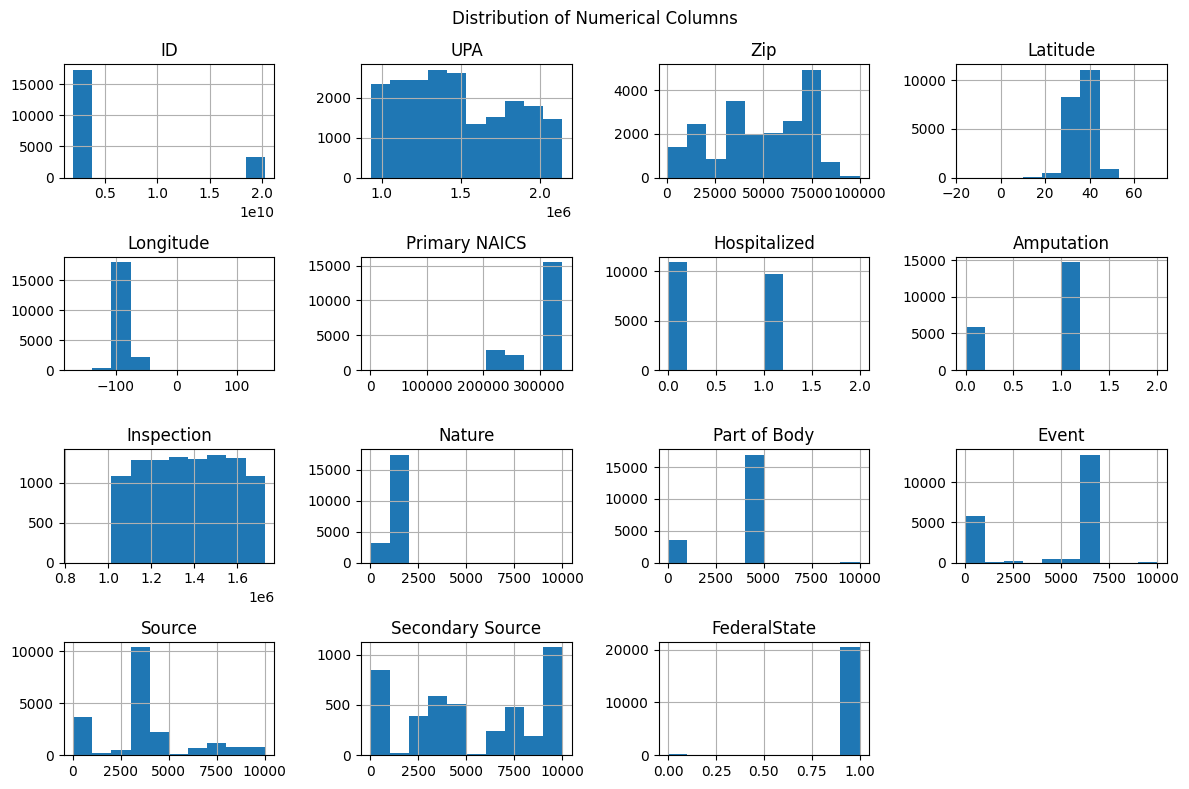

In [15]:
print("Loading data for information")
import pandas as pd
df = pd.read_csv("/content/HandInjuryData.csv")

print("\nPreview of the data:")
print(df.head())


print("\nDataset contains", df.shape[0], "rows and", df.shape[1], "columns.")


print("\nColumn names:")
print(df.columns.tolist())

print("\nData types and missing values:")
print(df.info())

print("\nStatistical summary of numerical columns:")
print(df.describe())

print("\nMissing values in each column:")
print(df.isnull().sum())

duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

if 'Machine_Type' in df.columns:
    print("\nUnique Machine Types:")
    print(df['Machine_Type'].value_counts())

if 'Injury_Severity' in df.columns:
    print("\nInjury Severity Distribution:")
    print(df['Injury_Severity'].value_counts())

try:
    import matplotlib.pyplot as plt
    df.hist(figsize=(12, 8))
    plt.suptitle("Distribution of Numerical Columns")
    plt.tight_layout()
    plt.show()
except ImportError:
    print("Matplotlib is not installed. Skipping histogram.")


Filtering for manufacturing records
Total records before filtering: 20629
Total records after filtering for 'Manufacturing': 20629
Total records removed: 0


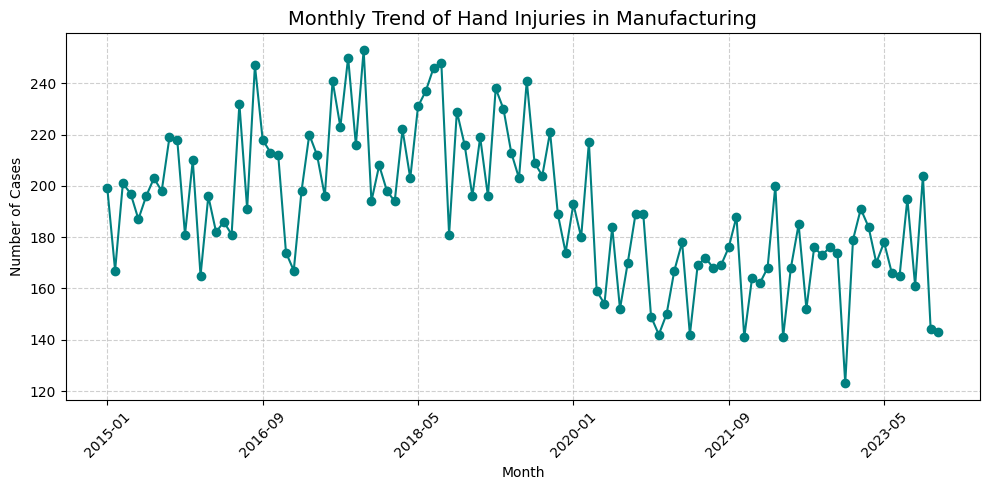

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Filtering for manufacturing records")

total_rows_before = df.shape[0]
df = df[df['NAICS Desc'].str.contains('Manufacturing', na=False, case=False)]
total_rows_after = df.shape[0]

print(f"Total records before filtering: {total_rows_before}")
print(f"Total records after filtering for 'Manufacturing': {total_rows_after}")
print(f"Total records removed: {total_rows_before - total_rows_after}")


if 'Machine Type' in df.columns:
    machine_counts = df['Machine Type'].value_counts().nlargest(7)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=machine_counts.values, y=machine_counts.index, palette='magma')
    plt.title("Most Common Machine Types in Hand Injuries", fontsize=14)
    plt.xlabel("Number of Cases")
    plt.ylabel("Machine Type")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

if 'Month' in df.columns:
    monthly_counts = df['Month'].value_counts().sort_index()
    plt.figure(figsize=(10, 5))
    monthly_counts.plot(kind='line', marker='o', color='teal')
    plt.title("Monthly Trend of Hand Injuries in Manufacturing", fontsize=14)
    plt.xlabel("Month")
    plt.ylabel("Number of Cases")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


if 'Injury_Severity' in df.columns:
    severity_counts = df['Injury_Severity'].value_counts()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='coolwarm')
    plt.title("Distribution of Injury Severity", fontsize=14)
    plt.xlabel("Injury Severity Level")
    plt.ylabel("Number of Cases")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


Filtering for hand-related injuries
Records before hand-related filtering: 20629
Records after hand-related filtering: 20629
Total hand-related injury cases identified: 20629
Records removed: 0

Most frequent body parts mentioned (filtered):
General Part of Body
Upper Extremities      19161
Multiple Body Parts      646
Lower Extremities        268
Trunk                    208
Body Systems             137
Name: count, dtype: int64

Sample 'Final Narrative' descriptions of hand injuries:
['An employee was manually moving yarn stuck in the texturizer on the extrusion line. The machine was turned back on and amputated the left index fingertip.', "An employee was operating the groove side end matcher machine when the rotating saw blade contacted the employee's fingers resulting in partial amputation of the left thumb and index finger.", 'An employee was running a concrete pump truck when the boom struck either the employee or handrail, causing the employee and handrail to fall 29 feet. The 

<ipython-input-17-1b6077a23677>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_counts.values, y=body_counts.index, palette='viridis')


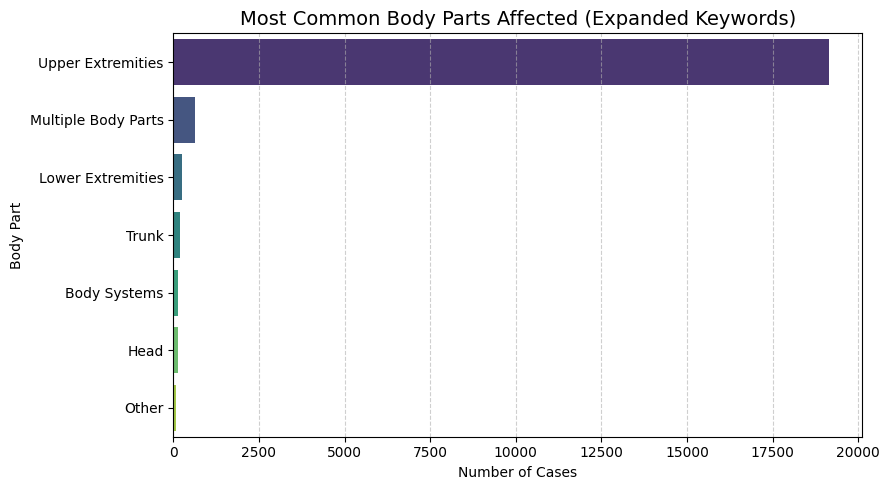

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Filtering for hand-related injuries")

keywords = [
    'hand', 'finger', 'thumb', 'palm', 'wrist', 'knuckle', 'fingertip',
    'forearm', 'nail', 'index finger', 'middle finger', 'ring finger',
    'little finger', 'pinkie', 'thumb tip', 'upper extremity'
]


total_before = df.shape[0]


df = df[
    df['General Part of Body'].str.contains('|'.join(keywords), na=False, case=False) |
    df['Final Narrative'].str.contains('|'.join(keywords), na=False, case=False)
]


total_after = df.shape[0]


print(f"Records before hand-related filtering: {total_before}")
print(f"Records after hand-related filtering: {total_after}")
print(f"Total hand-related injury cases identified: {total_after}")
print(f"Records removed: {total_before - total_after}")


print("\nMost frequent body parts mentioned (filtered):")
print(df['General Part of Body'].value_counts().head(5))


print("\nSample 'Final Narrative' descriptions of hand injuries:")
print(df['Final Narrative'].dropna().sample(3, random_state=1).to_list())


if 'General Part of Body' in df.columns and not df['General Part of Body'].isnull().all():
    body_counts = df['General Part of Body'].value_counts().nlargest(7)
    plt.figure(figsize=(9, 5))
    sns.barplot(x=body_counts.values, y=body_counts.index, palette='viridis')
    plt.title("Most Common Body Parts Affected (Expanded Keywords)", fontsize=14)
    plt.xlabel("Number of Cases")
    plt.ylabel("Body Part")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("General Part of Body' column is empty")


In [18]:
print("Cleaning date formats")
df['EventDate'] = pd.to_datetime(df['EventDate'], errors='coerce')
df['Month'] = df['EventDate'].dt.to_period('M')



non_null_before = df['EventDate'].notnull().sum()

df['EventDate'] = pd.to_datetime(df['EventDate'], errors='coerce')


non_null_after = df['EventDate'].notnull().sum()
print(f"Non-null 'EventDate' values before conversion: {non_null_before}")
print(f"Successfully parsed 'EventDate' values: {non_null_after}")
print(f"Dates with errors or missing: {non_null_before - non_null_after}")


df['Month'] = df['EventDate'].dt.to_period('M')
df['Year'] = df['EventDate'].dt.year


print("\nSample converted dates:")
print(df[['EventDate', 'Month', 'Year']].dropna().head())


if df['Year'].notnull().any():
    print("\nInjury records per year:")
    print(df['Year'].value_counts().sort_index())


Cleaning date formats
Non-null 'EventDate' values before conversion: 20629
Successfully parsed 'EventDate' values: 20629
Dates with errors or missing: 0

Sample converted dates:
   EventDate    Month  Year
0 2023-12-31  2023-12  2023
1 2023-12-31  2023-12  2023
2 2023-12-30  2023-12  2023
3 2023-12-29  2023-12  2023
4 2023-12-29  2023-12  2023

Injury records per year:
Year
2015    2376
2016    2397
2017    2578
2018    2601
2019    2537
2020    2078
2021    1984
2022    1998
2023    2080
Name: count, dtype: int64


In [19]:
print("Dropping rows with missing narratives")

rows_before = df.shape[0]

missing_narratives = df['Final Narrative'].isnull().sum()
print(f"Rows with missing 'Final Narrative': {missing_narratives}")

df = df.dropna(subset=['Final Narrative'])

rows_after = df.shape[0]

print(f"Total rows before dropping: {rows_before}")
print(f"Total rows after dropping missing narratives: {rows_after}")
print(f"Total rows removed: {rows_before - rows_after}")

Dropping rows with missing narratives
Rows with missing 'Final Narrative': 0
Total rows before dropping: 20629
Total rows after dropping missing narratives: 20629
Total rows removed: 0


In [20]:
import re

print("Cleaning 'Final Narrative' text for NLP")

print("\nOriginal Narratives Sample:")
print(df['Final Narrative'].dropna().sample(3, random_state=1).to_list())


df['Cleaned Narrative'] = df['Final Narrative'].str.lower().apply(
    lambda x: re.sub(r'[^a-z\s]', '', x)
)

df['Cleaned Narrative'] = df['Cleaned Narrative'].str.replace(r'\s+', ' ', regex=True).str.strip()

print("\nCleaned Narratives Sample:")
print(df['Cleaned Narrative'].dropna().sample(3, random_state=2).to_list())


df['Word Count'] = df['Cleaned Narrative'].apply(lambda x: len(x.split()))
print("\nAverage word count in cleaned narratives:", df['Word Count'].mean())

Cleaning 'Final Narrative' text for NLP

Original Narratives Sample:
['An employee was manually moving yarn stuck in the texturizer on the extrusion line. The machine was turned back on and amputated the left index fingertip.', "An employee was operating the groove side end matcher machine when the rotating saw blade contacted the employee's fingers resulting in partial amputation of the left thumb and index finger.", 'An employee was running a concrete pump truck when the boom struck either the employee or handrail, causing the employee and handrail to fall 29 feet. The employee was hospitalized with a head laceration, five broken ribs, a broken ankle, and a fractured']

Cleaned Narratives Sample:
['an employee was using a circular saw to cut plywood when his glove was caught by the blade his left hand was pulled into the blade resulting in amputation of the index finger and a laceration to the middle finger', 'while an employee was removing the wooden shipping frame from a bundle of 

In [21]:
print("Tagging likely cause of injury")
def tag_cause(text):
    if pd.isnull(text): return 'Unknown'
    text = text.lower()

    if 'slip' in text or 'fall' in text:
        return 'Slipping/Tripping'
    if 'unguarded' in text or 'guard' in text:
        return 'Unguarded Equipment'
    if 'pinch' in text or 'crush' in text or 'jammed' in text:
        return 'Pinch/Crush Injury'
    if 'caught' in text:
        return 'Caught-In Machinery'


    if 'saw' in text:
        return 'Machine Saw'
    if 'press' in text or 'die' in text:
        return 'Hydraulic/Trim Press'
    if 'lathe' in text:
        return 'Lathe Machine'
    if 'knife' in text or 'blade' in text or 'cutter' in text:
        return 'Knife/Blade'
    if 'conveyor' in text:
        return 'Conveyor'
    if 'drill' in text:
        return 'Drill'
    if 'grinder' in text:
        return 'Grinder'
    if 'shear' in text:
        return 'Shearing Machine'
    if 'bender' in text:
        return 'Bender Machine'
    if 'roll former' in text:
        return 'Roll Forming Machine'
    if 'bagging' in text or 'packaging' in text:
        return 'Packaging Machine'
    if 'sandblast' in text:
        return 'Sandblasting Equipment'
    if 'crane' in text or 'hoist' in text:
        return 'Crane/Lift'
    if 'switch' in text or 'panel' in text or 'control' in text:
        return 'Electrical Controls'

    return 'Other'

df['Likely Cause'] = df['Cleaned Narrative'].apply(tag_cause)


Tagging likely cause of injury


Tagging likely cause of injury based on narrative keywords...

Top 10 likely causes identified:
Likely Cause
Other                   5464
Caught-In Machinery     5062
Pinch/Crush Injury      3672
Machine Saw             1408
Slipping/Tripping       1365
Hydraulic/Trim Press     925
Unguarded Equipment      852
Knife/Blade              620
Conveyor                 283
Crane/Lift               229
Name: count, dtype: int64

Tagged 'Unknown': 0 cases


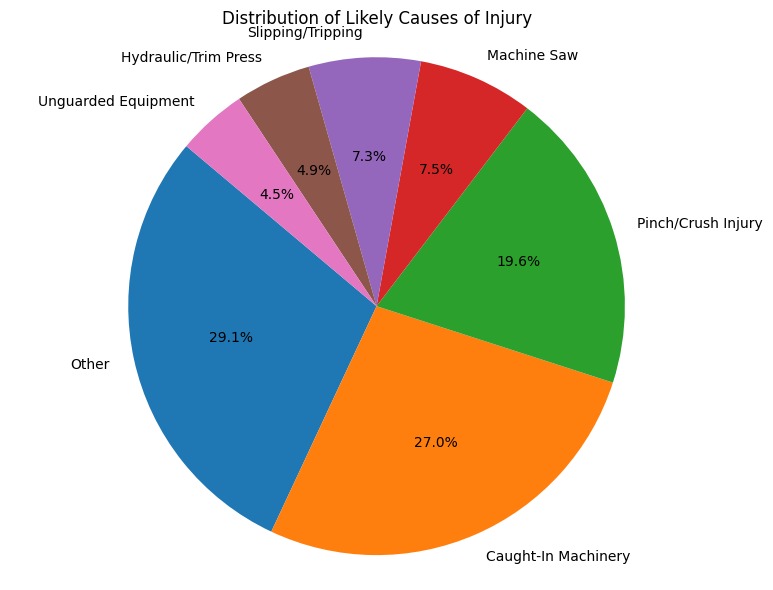

In [22]:
print("Tagging likely cause of injury based on narrative keywords...")


def tag_cause(text):
    if pd.isnull(text): return 'Unknown'
    text = text.lower()


    if 'slip' in text or 'fall' in text:
        return 'Slipping/Tripping'
    if 'unguarded' in text or 'guard' in text:
        return 'Unguarded Equipment'
    if 'pinch' in text or 'crush' in text or 'jammed' in text:
        return 'Pinch/Crush Injury'
    if 'caught' in text:
        return 'Caught-In Machinery'
    if 'saw' in text:
        return 'Machine Saw'
    if 'press' in text or 'die' in text:
        return 'Hydraulic/Trim Press'
    if 'lathe' in text:
        return 'Lathe Machine'
    if 'knife' in text or 'blade' in text or 'cutter' in text:
        return 'Knife/Blade'
    if 'conveyor' in text:
        return 'Conveyor'
    if 'drill' in text:
        return 'Drill'
    if 'grinder' in text:
        return 'Grinder'
    if 'shear' in text:
        return 'Shearing Machine'
    if 'bender' in text:
        return 'Bender Machine'
    if 'roll former' in text:
        return 'Roll Forming Machine'
    if 'bagging' in text or 'packaging' in text:
        return 'Packaging Machine'
    if 'sandblast' in text:
        return 'Sandblasting Equipment'
    if 'crane' in text or 'hoist' in text:
        return 'Crane/Lift'
    if 'switch' in text or 'panel' in text or 'control' in text:
        return 'Electrical Controls'

    return 'Other'


df['Likely Cause'] = df['Cleaned Narrative'].apply(tag_cause)


print("\nTop 10 likely causes identified:")
print(df['Likely Cause'].value_counts().head(10))


unknowns = df['Likely Cause'].value_counts().get('Unknown', 0)
print(f"\nTagged 'Unknown': {unknowns} cases")


import matplotlib.pyplot as plt

cause_counts = df['Likely Cause'].value_counts().nlargest(7)
plt.figure(figsize=(8, 6))
plt.pie(cause_counts.values, labels=cause_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Likely Causes of Injury")
plt.axis('equal')
plt.tight_layout()
plt.show()


Extracting top keywords


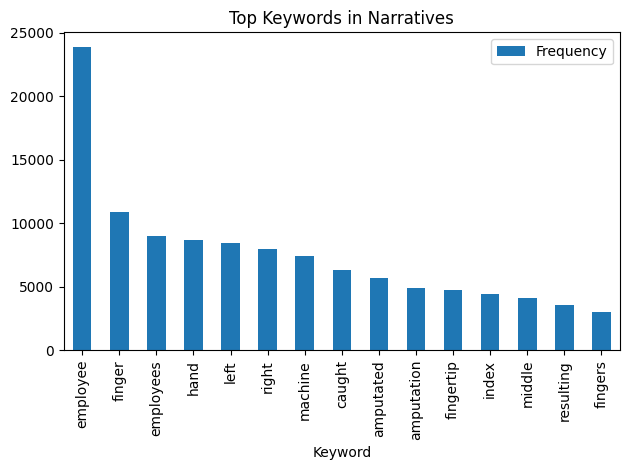

In [23]:
print("Extracting top keywords")
vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(df['Cleaned Narrative'])
keywords = vectorizer.get_feature_names_out()
keyword_freq = X.toarray().sum(axis=0)
keyword_df = pd.DataFrame({'Keyword': keywords, 'Frequency': keyword_freq})
keyword_df = keyword_df.sort_values(by='Frequency', ascending=False)

keyword_df.head(15).plot(x='Keyword', y='Frequency', kind='bar', title="Top Keywords in Narratives")
plt.tight_layout()
plt.show()


In [24]:
import spacy

print("Extracting named entities from narratives using spaCy")


try:
    nlp = spacy.load("en_core_web_sm")
except:
    print("Model not found. Run this in your notebook to install:\n!python -m spacy download en_core_web_sm")


def extract_entities(text):
    if pd.isnull(text):
        return "None"
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return ', '.join(entities) if entities else "None"


print("\nSample narrative (before extraction):")
print(df['Cleaned Narrative'].dropna().iloc[0])


df['Narrative Entities'] = df['Cleaned Narrative'].apply(extract_entities)


print("\nSample extracted entities:")
print(df[['Cleaned Narrative', 'Narrative Entities']].dropna().head(3))


non_empty_entities = df['Narrative Entities'].apply(lambda x: x != "None").sum()
print(f"\nEntity extraction complete. Rows with extracted entities: {non_empty_entities} out of {len(df)}")


entity_series = df['Narrative Entities'].dropna().str.split(', ').explode()
entity_counts = entity_series.value_counts().head(10)

print("\nTop 10 most common extracted entities:")
print(entity_counts)


Extracting named entities from narratives using spaCy

Sample narrative (before extraction):
an employee was resetting the chain at the core station he stepped onto the foot pedal that raises and lowers the hoist as he grabbed the chain and sustained amputation of his left index and ring fingers

Sample extracted entities:
                                   Cleaned Narrative Narrative Entities
0  an employee was resetting the chain at the cor...               None
1  an employee was closing an office door when th...               None
2  an employee was rotating a carbide granulator ...               None

Entity extraction complete. Rows with extracted entities: 5556 out of 20629

Top 10 most common extracted entities:
Narrative Entities
None                15073
two                  1486
first                 899
three                 471
second                445
one                   378
four                  243
third                 219
october               148
approximately pm 

In [25]:
import spacy
from spacy.pipeline import EntityRuler

print("Extracting entities using custom NER (spaCy EntityRuler)")

nlp = spacy.load("en_core_web_sm")

ruler = nlp.add_pipe("entity_ruler", before="ner")

patterns = [
    {"label": "BODY_PART", "pattern": "finger"},
    {"label": "BODY_PART", "pattern": "hand"},
    {"label": "BODY_PART", "pattern": "wrist"},
    {"label": "BODY_PART", "pattern": "forearm"},
    {"label": "TOOL", "pattern": "knife"},
    {"label": "TOOL", "pattern": "blade"},
    {"label": "MACHINE", "pattern": "lathe"},
    {"label": "MACHINE", "pattern": "drill"},
    {"label": "MACHINE", "pattern": "press"},
    {"label": "MACHINE", "pattern": "conveyor"},
    {"label": "ACTION", "pattern": "slipped"},
    {"label": "ACTION", "pattern": "caught"},
    {"label": "ACTION", "pattern": "jammed"},
    {"label": "ACTION", "pattern": "pinched"},
    {"label": "TOOL", "pattern": "cutter"},
    {"label": "MACHINE", "pattern": "grinder"},
    {"label": "MACHINE", "pattern": "shear"},
    {"label": "TOOL", "pattern": "screwdriver"},
    {"label": "MACHINE", "pattern": "bender"}
]

ruler.add_patterns(patterns)

def extract_custom_entities(text):
    if pd.isnull(text): return "None"
    doc = nlp(text)
    return ', '.join(f"{ent.text} ({ent.label_})" for ent in doc.ents) if doc.ents else "None"

df['Narrative Entities'] = df['Cleaned Narrative'].apply(extract_custom_entities)

print("\nSample custom NER results:")
print(df[['Cleaned Narrative', 'Narrative Entities']].dropna().head(5))

with_entities = df['Narrative Entities'].apply(lambda x: x != "None").sum()
print(f"\n Custom NER complete. Rows with extracted entities: {with_entities} out of {len(df)}")

entity_series = df['Narrative Entities'].str.extractall(r'([^\(]+) \(([^)]+)\)')[1]
entity_counts = entity_series.value_counts().head(10)
print("\nTop entity types detected:")
print(entity_counts)


Extracting entities using custom NER (spaCy EntityRuler)

Sample custom NER results:
                                   Cleaned Narrative  \
0  an employee was resetting the chain at the cor...   
1  an employee was closing an office door when th...   
2  an employee was rotating a carbide granulator ...   
3  an employee was using a cnc metal lathe machin...   
4  an employee was operating a band saw when his ...   

                                  Narrative Entities  
0                                               None  
1                                    caught (ACTION)  
2  blade (TOOL), finger (BODY_PART), caught (ACTI...  
3                                    lathe (MACHINE)  
4                                               None  

 Custom NER complete. Rows with extracted entities: 18510 out of 20629

Top entity types detected:
1
BODY_PART    19907
ACTION        9310
MACHINE       5073
CARDINAL      2731
TOOL          2092
ORDINAL       1747
DATE          1439
TIME         

In [26]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch

nlp = spacy.blank("en")

if "ner" not in nlp.pipe_names:
    ner = nlp.add_pipe("ner")
else:
    ner = nlp.get_pipe("ner")

TRAIN_DATA = [
    ("Worker caught finger in lathe machine.", {
        "entities": [(13, 19, "BODY_PART"), (23, 36, "MACHINE")]
    }),
    ("Laceration on wrist from unguarded saw.", {
        "entities": [(15, 20, "BODY_PART"), (34, 37, "TOOL")]
    }),
    ("Operator injured thumb while using drill press.", {
        "entities": [(17, 22, "BODY_PART"), (35, 46, "MACHINE")]
    }),
    ("Forearm crushed in conveyor.", {
        "entities": [(0, 7, "BODY_PART"), (21, 29, "MACHINE")]
    }),
    ("Blade sliced employee's palm.", {
        "entities": [(0, 5, "TOOL"), (23, 27, "BODY_PART")]
    })
]

for _, annotations in TRAIN_DATA:
    for start, end, label in annotations["entities"]:
        ner.add_label(label)

import random
from tqdm import tqdm

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]

with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for epoch in range(30):
        random.shuffle(TRAIN_DATA)
        losses = {}
        batches = minibatch(TRAIN_DATA, size=2)
        for batch in batches:
            for text, annotations in batch:
                example = Example.from_dict(nlp.make_doc(text), annotations)
                nlp.update([example], drop=0.2, losses=losses)
        print(f"Epoch {epoch+1}, Loss: {losses['ner']:.4f}")

output_dir = "custom_ner_model"
nlp.to_disk(output_dir)
print(f"\n Model saved to '{output_dir}'")

print("\n🔍 Testing custom NER model:")
custom_nlp = spacy.load(output_dir)

test_text = "The operator's wrist was pinched by the drill press."
doc = custom_nlp(test_text)

print("Text:", test_text)
print("Extracted Entities:")
for ent in doc.ents:
    print(f"- {ent.text} ({ent.label_})")


/usr/local/lib/python3.11/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Laceration on wrist from unguarded saw." with entities "[(15, 20, 'BODY_PART'), (34, 37, 'TOOL')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Blade sliced employee's palm." with entities "[(0, 5, 'TOOL'), (23, 27, 'BODY_PART')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Worker caught finger in lathe machine." wit

Epoch 1, Loss: 22.9766
Epoch 2, Loss: 17.3914
Epoch 3, Loss: 8.8985
Epoch 4, Loss: 7.0031
Epoch 5, Loss: 5.6485
Epoch 6, Loss: 4.4591
Epoch 7, Loss: 4.2025
Epoch 8, Loss: 6.9222
Epoch 9, Loss: 2.7784
Epoch 10, Loss: 2.1982
Epoch 11, Loss: 1.7026
Epoch 12, Loss: 3.8445
Epoch 13, Loss: 1.2430
Epoch 14, Loss: 0.8379
Epoch 15, Loss: 0.4641
Epoch 16, Loss: 0.0425
Epoch 17, Loss: 0.0065
Epoch 18, Loss: 0.0006
Epoch 19, Loss: 0.0010
Epoch 20, Loss: 0.0000
Epoch 21, Loss: 0.0000
Epoch 22, Loss: 0.0000
Epoch 23, Loss: 0.0001
Epoch 24, Loss: 0.0001
Epoch 25, Loss: 0.0000
Epoch 26, Loss: 0.0000
Epoch 27, Loss: 0.0000
Epoch 28, Loss: 0.0000
Epoch 29, Loss: 0.0000
Epoch 30, Loss: 0.0000

 Model saved to 'custom_ner_model'

🔍 Testing custom NER model:
Text: The operator's wrist was pinched by the drill press.
Extracted Entities:
- drill press (MACHINE)


In [27]:
import spacy
from spacy.training.example import Example
from spacy.util import minibatch
from spacy.pipeline import EntityRuler
from spacy import displacy
import random

nlp = spacy.blank("en")

if "ner" not in nlp.pipe_names:
    ner = nlp.add_pipe("ner")
else:
    ner = nlp.get_pipe("ner")

ruler = nlp.add_pipe("entity_ruler", before="ner")
ruler.add_patterns([
    {"label": "BODY_PART", "pattern": "finger"},
    {"label": "BODY_PART", "pattern": "wrist"},
    {"label": "MACHINE", "pattern": "lathe"},
    {"label": "TOOL", "pattern": "blade"},
    {"label": "TOOL", "pattern": "knife"},
    {"label": "MACHINE", "pattern": "press"},
    {"label": "CAUSE", "pattern": "caught"},
    {"label": "CAUSE", "pattern": "jammed"},
])


TRAIN_DATA = [
    ("Worker caught finger in lathe machine.", {
        "entities": [(13, 19, "BODY_PART"), (23, 36, "MACHINE")]
    }),
    ("Laceration on wrist from unguarded saw.", {
        "entities": [(15, 20, "BODY_PART"), (34, 37, "TOOL")]
    }),
    ("Operator injured thumb while using drill press.", {
        "entities": [(17, 22, "BODY_PART"), (35, 46, "MACHINE")]
    }),
    ("Forearm crushed in conveyor.", {
        "entities": [(0, 7, "BODY_PART"), (21, 29, "MACHINE")]
    }),
    ("Blade sliced employee's palm.", {
        "entities": [(0, 5, "TOOL"), (23, 27, "BODY_PART")]
    }),
]

for _, ann in TRAIN_DATA:
    for start, end, label in ann["entities"]:
        ner.add_label(label)

print("Training custom NER model")
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
with nlp.disable_pipes(*other_pipes):
    optimizer = nlp.begin_training()
    for epoch in range(30):
        random.shuffle(TRAIN_DATA)
        losses = {}
        batches = minibatch(TRAIN_DATA, size=2)
        for batch in batches:
            for text, annotations in batch:
                example = Example.from_dict(nlp.make_doc(text), annotations)
                nlp.update([example], drop=0.2, losses=losses)
        print(f"Epoch {epoch+1} | Loss: {losses['ner']:.4f}")

output_dir = "custom_ner_model"
nlp.to_disk(output_dir)
print(f"\n Custom model saved to '{output_dir}'")

print("\n Testing model:")
custom_nlp = spacy.load(output_dir)

test_text = "The operator's wrist was caught in the press machine."
doc = custom_nlp(test_text)

print("\nExtracted Entities:")
for ent in doc.ents:
    print(f"- {ent.text} ({ent.label_})")

displacy.render(doc, style="ent", jupyter=True)

print("\n Evaluating model")
TEST_DATA = [
    ("Finger was jammed in the lathe.", {
        "entities": [(0, 6, "BODY_PART"), (25, 30, "MACHINE")]
    }),
    ("Thumb laceration due to unguarded press.", {
        "entities": [(0, 5, "BODY_PART"), (34, 39, "MACHINE")]
    }),
]

examples = [Example.from_dict(custom_nlp.make_doc(text), ann) for text, ann in TEST_DATA]
results = custom_nlp.evaluate(examples)
print("\nEvaluation Results:")
print(results)


Training custom NER model
Epoch 1 | Loss: 22.9331
Epoch 2 | Loss: 17.3504
Epoch 3 | Loss: 7.2276
Epoch 4 | Loss: 7.5826
Epoch 5 | Loss: 7.1211
Epoch 6 | Loss: 5.6830
Epoch 7 | Loss: 4.8655
Epoch 8 | Loss: 3.9839
Epoch 9 | Loss: 3.3657
Epoch 10 | Loss: 2.5400
Epoch 11 | Loss: 5.1584
Epoch 12 | Loss: 1.8004
Epoch 13 | Loss: 1.9328
Epoch 14 | Loss: 1.0884
Epoch 15 | Loss: 0.5227
Epoch 16 | Loss: 0.1867
Epoch 17 | Loss: 0.0059
Epoch 18 | Loss: 0.0000
Epoch 19 | Loss: 0.0000
Epoch 20 | Loss: 0.0004
Epoch 21 | Loss: 0.0000
Epoch 22 | Loss: 0.0000
Epoch 23 | Loss: 0.0000
Epoch 24 | Loss: 0.0000
Epoch 25 | Loss: 0.0000
Epoch 26 | Loss: 0.0000
Epoch 27 | Loss: 0.0000
Epoch 28 | Loss: 0.0000
Epoch 29 | Loss: 0.0000
Epoch 30 | Loss: 0.0000

 Custom model saved to 'custom_ner_model'

 Testing model:

Extracted Entities:
- The (BODY_PART)
- wrist (BODY_PART)
- caught (CAUSE)
- press (MACHINE)



 Evaluating model

Evaluation Results:
{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'ents_p': 0.6, 'ents_r': 0.75, 'ents_f': 0.6666666666666665, 'ents_per_type': {'BODY_PART': {'p': 1.0, 'r': 0.5, 'f': 0.6666666666666666}, 'CAUSE': {'p': 0.0, 'r': 0.0, 'f': 0.0}, 'MACHINE': {'p': 1.0, 'r': 1.0, 'f': 1.0}, 'TOOL': {'p': 0.0, 'r': 0.0, 'f': 0.0}}, 'speed': 3305.6625763508846}


In [28]:
print("Exporting final processed file for Power BI")
df.to_csv("hand_injuries_with_machines.csv", index=False)
print("File saved successfully as: hand_injuries_with_machines.csv")

print(f"\nFinal dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("Columns included:", ', '.join(df.columns[:8]) + " etc" if df.shape[1] > 8 else ', '.join(df.columns))

print("All processing steps completed successfully.")


Exporting final processed file for Power BI
File saved successfully as: hand_injuries_with_machines.csv

Final dataset shape: 20629 rows × 40 columns
Columns included: ID, UPA, EventDate, Employer, Address1, Address2, City, State etc
All processing steps completed successfully.


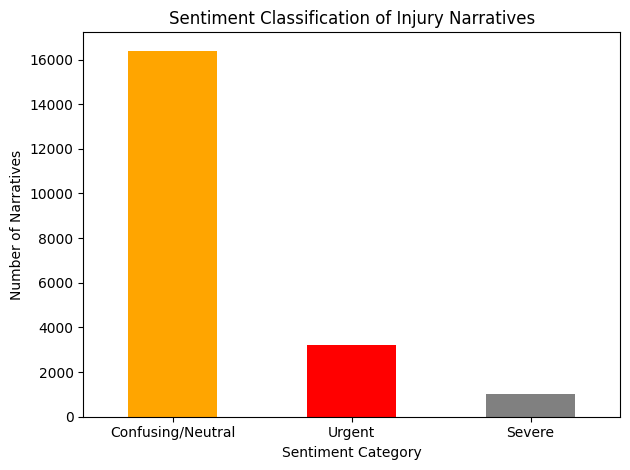

In [29]:
from textblob import TextBlob
import matplotlib.pyplot as plt

df['sentiment_polarity'] = df['Final Narrative'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


def classify_sentiment(score):
    if score > 0.2:
        return 'Urgent'
    elif score < -0.2:
        return 'Severe'
    else:
        return 'Confusing/Neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(classify_sentiment)


sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['orange', 'red', 'gray'], title='Sentiment Classification of Injury Narratives')
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Narratives")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english', max_features=10)


top_keywords_by_machine = {}

for machine in df['Cleaned Source'].dropna().unique():
    texts = df[df['Cleaned Source'] == machine]['Final Narrative'].dropna().astype(str)
    if len(texts) >= 5:
        tfidf_matrix = tfidf.fit_transform(texts)
        keywords = tfidf.get_feature_names_out()
        top_keywords_by_machine[machine] = list(keywords)


for machine, keywords in list(top_keywords_by_machine.items())[:5]:
    print(f"\nMachine: {machine}\nKeywords: {', '.join(keywords)}")



Machine: Crane/Lift
Keywords: caught, crane, employee, finger, fingertip, forklift, hand, left, lift, right

Machine: Other
Keywords: amputated, amputation, caught, employee, finger, fingertip, hand, left, machine, right

Machine: Knife/Blade
Keywords: amputated, blade, cutter, employee, finger, fingertip, hand, left, machine, right

Machine: Lathe Machine
Keywords: caught, employee, finger, hand, lathe, left, machine, right, shaft, using

Machine: Machine Saw
Keywords: amputated, blade, cut, cutting, employee, finger, hand, left, right, saw


In [31]:
import pandas as pd
from rake_nltk import Rake
import nltk

nltk.download('stopwords')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

if 'df' not in globals():
    print("Loading data...")
    try:
        df = pd.read_csv("HandInjuryData.csv")
        print("Data loaded successfully.")
    except FileNotFoundError:
        print("Error: HandInjuryData.csv not found. Please check the file path.")
        exit()

rake_extractor = Rake()

if 'Final Narrative' in df.columns and not df['Final Narrative'].dropna().empty:
    sample_narratives = df['Final Narrative'].dropna()
    if not sample_narratives.empty:
        example_text = sample_narratives.iloc[0]
        rake_extractor.extract_keywords_from_text(example_text)
        print("RAKE Keywords from one narrative:", rake_extractor.get_ranked_phrases()[:10])
    else:
         print("⚠️ 'Final Narrative' column is empty after dropping NaNs.")
else:
    print("⚠️ 'Final Narrative' column is missing or empty.")

RAKE Keywords from one narrative: ['sustained amputation', 'stepped onto', 'ring fingers', 'left index', 'foot pedal', 'core station', 'resetting', 'raises', 'lowers', 'hoist']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracting RAKE keywords from narratives...
Finished extracting RAKE keywords for 23 sources.


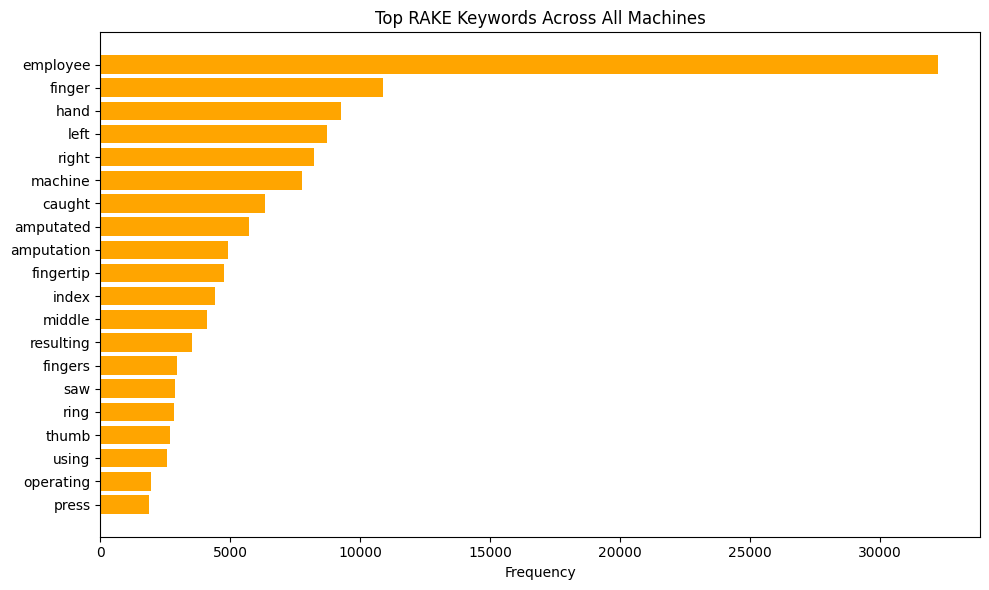

In [32]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from rake_nltk import Rake
import nltk

if 'rake_extractor' not in globals():
    print("Initializing RAKE...")
    try:

        nltk.download('stopwords', quiet=True)
        nltk.download('punkt_tab', quiet=True)
        rake_extractor = Rake()
    except LookupError:
        print("NLTK data not found. Please run `nltk.download('stopwords')` and `nltk.download('punkt_tab')`.")
        exit()


rake_keywords_by_machine = {}

print("Extracting RAKE keywords from narratives...")

valid_narratives = df.dropna(subset=['Final Narrative', 'Cleaned Source'])


for source, group_df in valid_narratives.groupby('Cleaned Source'):
    narratives = group_df['Final Narrative'].dropna().astype(str).tolist()
    if narratives:
        all_source_keywords = []
        for narrative in narratives:

            if narrative and narrative.strip():
                rake_extractor.extract_keywords_from_text(narrative)

                phrases = rake_extractor.get_ranked_phrases()

                words_from_phrases = [word for phrase in phrases for word in phrase.split()]
                all_source_keywords.extend(words_from_phrases)


        if all_source_keywords:
            rake_keywords_by_machine[source] = all_source_keywords
        else:

             rake_keywords_by_machine[source] = []


print(f"Finished extracting RAKE keywords for {len(rake_keywords_by_machine)} sources.")


all_keywords = [word for words_list in rake_keywords_by_machine.values() for word in words_list]

keyword_counts = Counter(all_keywords)

top_keywords_df = pd.DataFrame(keyword_counts.items(), columns=["Keyword", "Frequency"])
top_keywords_df = top_keywords_df.sort_values(by="Frequency", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_keywords_df["Keyword"], top_keywords_df["Frequency"], color='orange')
plt.xlabel("Frequency")
plt.title("Top RAKE Keywords Across All Machines")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [33]:
from textblob import TextBlob

df['sentiment_polarity'] = df['Final Narrative'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

def classify_sentiment(score):
    if score > 0.2:
        return 'Urgent'
    elif score < -0.2:
        return 'Severe'
    else:
        return 'Confusing/Neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(classify_sentiment)


In [34]:
sentiment_summary = df.groupby(['Cleaned Source', 'sentiment_label']).size().unstack(fill_value=0).reset_index()
sentiment_summary.columns.name = None


In [35]:
rake_keywords_df = pd.DataFrame([
    {"Cleaned Source": machine, "Top Keywords": ", ".join(phrases)}
    for machine, phrases in rake_keywords_by_machine.items()
])


In [36]:
final_df = pd.merge(rake_keywords_df, sentiment_summary, on="Cleaned Source", how="left")

final_df.head()


,Cleaned Source,Top Keywords,Confusing/Neutral,Severe,Urgent
0,Bender Machine,"right, index, fingertip, partial, fingertip, a...",45,0,17
1,Canning Line,"rotating, metal, vanes, rotary, valve, resulti...",1,0,0
2,Cleaning Equipment,"two, rollers, causing, amputations, three, fin...",527,16,138
3,Conveyor,"right, hand, fifth, fingertip, chain, sprocket...",800,24,196
4,Crane/Lift,"sustained, amputation, stepped, onto, ring, fi...",1222,58,229


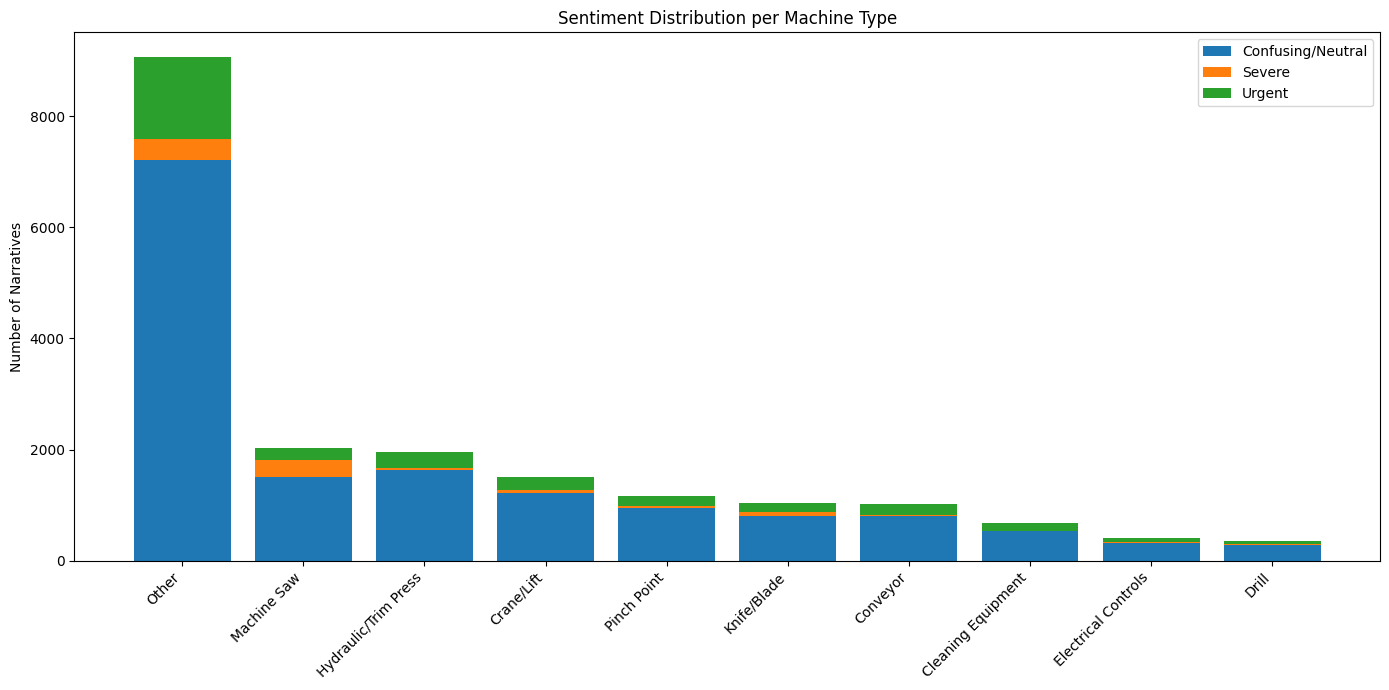

In [37]:
import matplotlib.pyplot as plt

top_machines = final_df.copy()
top_machines['Total'] = top_machines[['Urgent', 'Severe', 'Confusing/Neutral']].sum(axis=1)
top_machines = top_machines.sort_values(by='Total', ascending=False).head(10)


plt.figure(figsize=(14, 7))
bar1 = plt.bar(top_machines['Cleaned Source'], top_machines['Confusing/Neutral'], label='Confusing/Neutral')
bar2 = plt.bar(top_machines['Cleaned Source'], top_machines['Severe'], bottom=top_machines['Confusing/Neutral'], label='Severe')
bar3 = plt.bar(top_machines['Cleaned Source'], top_machines['Urgent'],
               bottom=top_machines['Confusing/Neutral'] + top_machines['Severe'], label='Urgent')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Narratives')
plt.title('Sentiment Distribution per Machine Type')
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
print("🔍 Preview of merged insights:")
display(final_df.head(10))

🔍 Preview of merged insights:


,Cleaned Source,Top Keywords,Confusing/Neutral,Severe,Urgent
0,Bender Machine,"right, index, fingertip, partial, fingertip, a...",45,0,17
1,Canning Line,"rotating, metal, vanes, rotary, valve, resulti...",1,0,0
2,Cleaning Equipment,"two, rollers, causing, amputations, three, fin...",527,16,138
3,Conveyor,"right, hand, fifth, fingertip, chain, sprocket...",800,24,196
4,Crane/Lift,"sustained, amputation, stepped, onto, ring, fi...",1222,58,229
5,Drill,"glove, became, caught, using, resident, fractu...",288,19,51
6,Electrical Controls,"gauge, ground, wire, touched, positive, busbar...",322,17,69
7,Grinder,"right, index, fingertip, grinding, chicken, gr...",193,10,42
8,Hydraulic/Trim Press,"right, gloved, hand, became, stuck, right, mid...",1626,47,290
9,Knife/Blade,"right, ring, fingertip, right, middle, finger,...",803,76,164
